In [1]:
# День 2. Обучение ML модели - Ссылка на видео:https://www.youtube.com/watch?v=9X6lgxEd4GQ&t=7945s

In [2]:
import pandas

In [3]:
df=pandas.read_excel("USD_Rates.xlsx")

In [4]:
df.head()

,nominal,data,curs,cdx
0,1,2016-03-01,75.8994,Доллар США
1,1,2016-03-02,74.0536,Доллар США
2,1,2016-03-03,73.6256,Доллар США
3,1,2016-03-04,73.8242,Доллар США
4,1,2016-03-05,73.1854,Доллар США


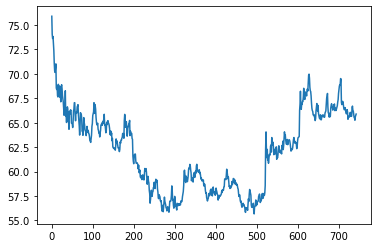

In [5]:
df.curs.plot()

In [6]:
past = 4 * 7 # Возьмем 4 недели из прошлого
future = 7 # Возьмем 7 дней из будущего

In [7]:
money = df.curs

In [8]:
start = past
end = len(money) - future

In [9]:
new_df = []
for i in range(start, end):
    all_days = money[(i-past):(i+future)]
    new_df.append(list(all_days))

In [10]:
past_columns = []
for i in range(past):
    past_columns.append(f"past_{i}")

In [11]:
future_columns = []
for i in range(future):
    future_columns.append(f"future_{i}")

In [12]:
transformed_df = pandas.DataFrame(new_df, columns = (past_columns + future_columns))

In [13]:
# Учебник, обучающая выборка

x = transformed_df[past_columns][:-1] # ТО, на основании чего модель будет делать предсказания
y = transformed_df[future_columns][:-1] # ТО, что модель должна предсказывать

In [14]:
# Экзамен, тестовая выборка

x_test = transformed_df[past_columns][-1:]
y_test = transformed_df[future_columns][-1:]

In [15]:
# Задача регрессии - по одним числам, определить другие
# Задача классификации - по входным данным - определить класс объекта

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
LinReg = LinearRegression()

In [18]:
LinReg.fit(x,y) # Обучение модели

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
prediction = LinReg.predict(x_test)

In [20]:
prediction

array([[66.17991412, 66.12349371, 66.09432247, 66.00256775, 65.91867656,
        65.9778731 , 66.00915148]])

In [21]:
y_test

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
708,66.2022,65.8568,65.5401,65.5149,65.2582,65.6182,65.757


In [22]:
import matplotlib.pyplot as plt

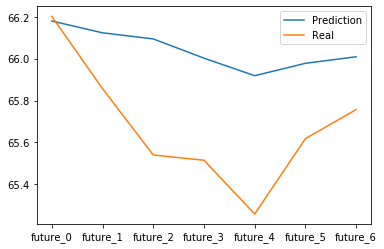

In [23]:
plt.plot(prediction[0], label = "Prediction")
plt.plot(y_test.iloc[0], label = "Real")
plt.legend()

In [24]:
from sklearn.metrics import mean_absolute_error

In [25]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.3718815617826924

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(x,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

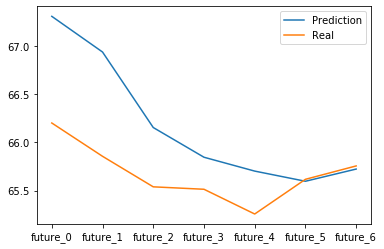

In [28]:
prediction = KNN.predict(x_test)
plt.plot(prediction[0], label = "Prediction")
plt.plot(y_test.iloc[0], label = "Real")
plt.legend()

In [29]:
from sklearn.neural_network import MLPRegressor

In [30]:
MLP = MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes=(50,50,50))
MLP.fit(x,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

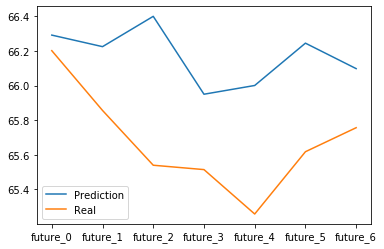

In [31]:
prediction = MLP.predict(x_test)
plt.plot(prediction[0], label = "Prediction")
plt.plot(y_test.iloc[0], label = "Real")
plt.legend()

In [32]:
mean_absolute_error(prediction[0], y_test.iloc[0])

0.49523344905282685

In [33]:
# ДЗ

# Использовать датасет из эфира
# Использовать random_state = 42
# 1. Документация по sklearn
# 2. Подобрать параметры для MLPRegressor, чтобы ошибка (MAE) была ниже чем в эфире 0.495
# 3. Выбрать из sklearn три других модели регрессии, которые мы еще не использовали - обучить и добиться наименьшей ошибки
# 4. Оформить результат в виде HTML файла (File -> Download as -> HTML), в файле должны быть:
# - комментерии
# - графики (https://matplotlib/gallery/index.html)
# - Выводы

# Важно!!! Разобраться и понять как работать с sklearn